## Decision Tree

In [33]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import pydot
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
%matplotlib inline

In [34]:
data = pd.read_csv("/content/drive/MyDrive/adult.data", sep = ",")
data.index += 1
print(data)

       age          workclass  fnlwgt    education  education-num  \
1       39          State-gov   77516    Bachelors             13   
2       50   Self-emp-not-inc   83311    Bachelors             13   
3       38            Private  215646      HS-grad              9   
4       53            Private  234721         11th              7   
5       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32557   27            Private  257302   Assoc-acdm             12   
32558   40            Private  154374      HS-grad              9   
32559   58            Private  151910      HS-grad              9   
32560   22            Private  201490      HS-grad              9   
32561   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
1            Never-married        Adm-clerical   Not-in-family   White   
2       Married-civ-spo

In [35]:
data.head(11)

age          workclass  fnlwgt      education  education-num  \
1    39          State-gov   77516      Bachelors             13   
2    50   Self-emp-not-inc   83311      Bachelors             13   
3    38            Private  215646        HS-grad              9   
4    53            Private  234721           11th              7   
5    28            Private  338409      Bachelors             13   
6    37            Private  284582        Masters             14   
7    49            Private  160187            9th              5   
8    52   Self-emp-not-inc  209642        HS-grad              9   
9    31            Private   45781        Masters             14   
10   42            Private  159449      Bachelors             13   
11   37            Private  280464   Some-college             10   

            marital-status          occupation    relationship    race  \
1            Never-married        Adm-clerical   Not-in-family   White   
2       Married-civ-spouse     Exec-managerial         Husband   White   
3                 Divorced   Handlers-cleaners   Not-in-family   White   
4       Married-civ-spouse   Handlers-cleaners         Husband   Black   
5       Married-civ-spouse      Prof-specialty            Wife   Black   
6       Married-civ-spouse     Exec-managerial            Wife   White   
7    Married-spouse-absent       Other-service   Not-in-family   Black   
8       Married-civ-spouse     Exec-managerial         Husband   White   
9            Never-married      Prof-specialty   Not-in-family   White   
10      Married-civ-spouse     Exec-managerial         Husband   White   
11      Married-civ-spouse     Exec-managerial         Husband   Black   

        sex  capital-gain  capital-loss  hours-per-week  native-country  \
1      Male          2174             0              40   United-States   
2      Male             0             0              13   United-States   
3      Male             0             0              40   United-States   
4      Male             0             0              40   United-States   
5    Female             0             0              40            Cuba   
6    Female             0             0              40   United-States   
7    Female             0             0              16         Jamaica   
8      Male             0             0              45   United-States   
9    Female         14084             0              50   United-States   
10     Male          5178             0              40   United-States   
11     Male             0             0              80   United-States   

   >50K or <=50K  
1          <=50K  
2          <=50K  
3          <=50K  
4          <=50K  
5          <=50K  
6          <=50K  
7          <=50K  
8           >50K  
9           >50K  
10          >50K  
11          >50K

In [36]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 1 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  >50K or <=50K   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

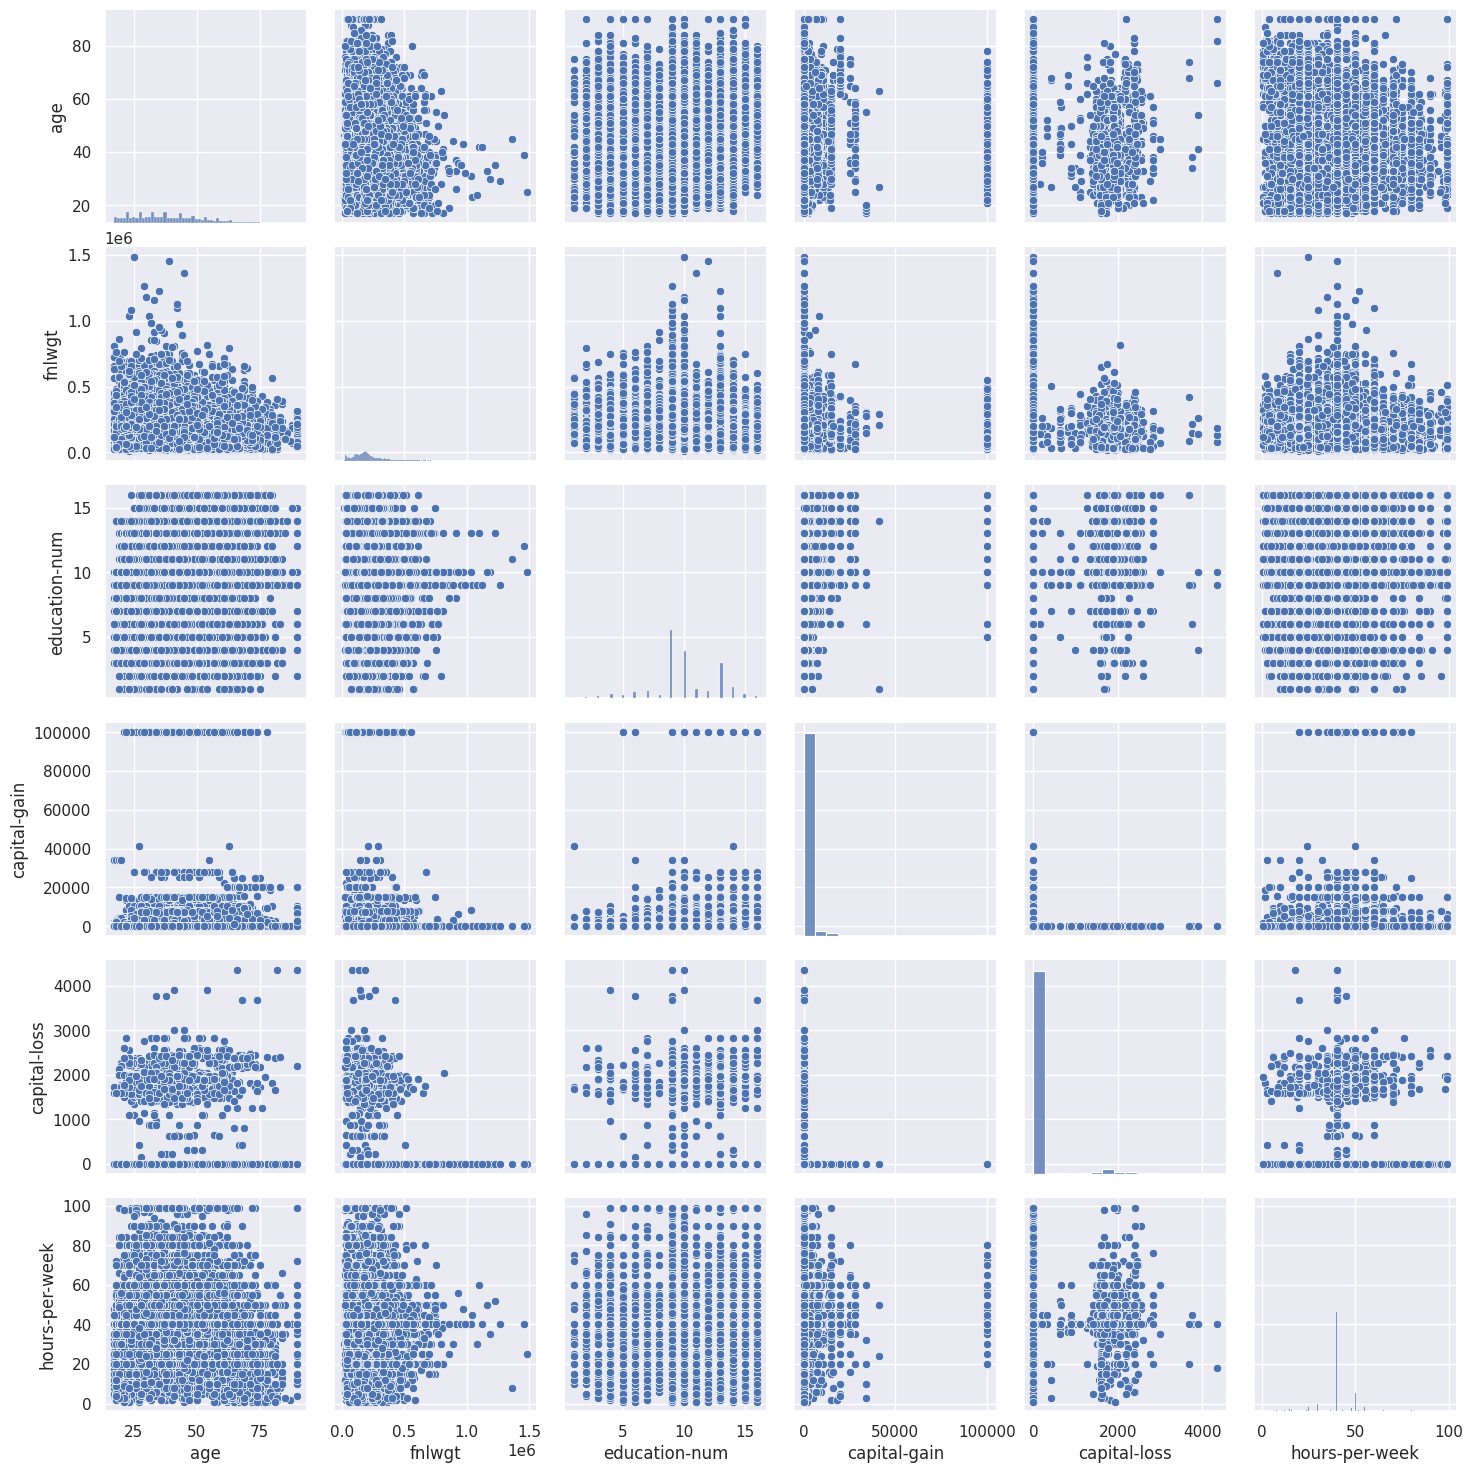

In [38]:
sns.pairplot(data,palette='viridus')

In [39]:
data['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

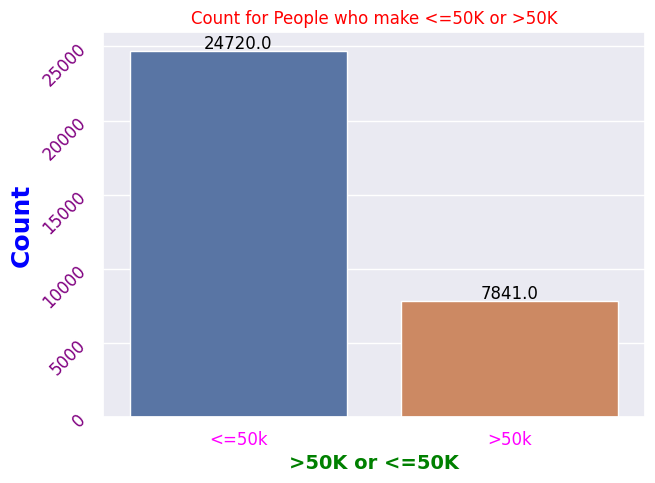

Number of people who make below 50K are 24720
Number of people who make above 50K are 7841


In [40]:
# Data column '>50K or <=50K' is containing income information
sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))

data['>50K or <=50K'] = data['>50K or <=50K'].str.strip().str.lower()

money_counts = data['>50K or <=50K'].value_counts()

# Store counts in variables
count_lt50K = money_counts.get('<=50k', 0)  # Corrected label to lowercase
count_gt50K = money_counts.get('>50k', 0)   # Corrected label to lowercase

# Ploting a countplot for the '>50K or <=50K' column
ax = sns.countplot(x='>50K or <=50K', data=data)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., \
                p.get_height()), ha='center', va='center', fontsize=12, \
                color='black', xytext=(0, 5), textcoords='offset points')


# Make axis names and title bolder with different colors
ax.set_ylabel('Count', fontsize=18, fontweight='bold', color='blue')
ax.set_xlabel('>50K or <=50K', fontsize=14, fontweight='bold', color='green')
plt.title('Count for People who make <=50K or >50K', fontsize=16, \
          fontweight='bold', color='red')

# Make y-axis tick labels colorful and rotate them
ax.tick_params(axis='y', colors='purple', labelsize=12, rotation=45)
ax.tick_params(axis='x', colors='magenta', labelsize=12)

# Show the plot
plt.title('Count for People who make <=50K or >50K')
plt.show()

# Display the counts
print('Number of people who make below 50K are', count_lt50K)
print('Number of people who make above 50K are', count_gt50K)


In [45]:
pct_lt50K = count_lt50K / (count_lt50K + count_gt50K)
pct_gt50K = count_gt50K / (count_lt50K + count_gt50K)

print('Percentage of people who make lt50K is ', pct_lt50K * 100)
print('Percentage of people who make lt50K is ', pct_gt50K * 100)

Percentage of people who make lt50K is  75.91904425539757
Percentage of people who make lt50K is  24.080955744602438


In [46]:
data.groupby('>50K or <=50K').mean()

<ipython-input-46-66ac8e42f7fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('>50K or <=50K').mean()


age        fnlwgt  education-num  capital-gain  \
>50K or <=50K                                                         
<=50k          36.783738  190340.86517       9.595065    148.752468   
>50k           44.249841  188005.00000      11.611657   4006.142456   

               capital-loss  hours-per-week  income_code  
>50K or <=50K                                             
<=50k             53.142921       38.840210          0.0  
>50k             195.001530       45.473026          1.0

In [47]:
data['>50K or <=50K'] = data['>50K or <=50K'].str.strip().str.lower()

# Create a new column 'income_code' based on the values in '>50K or <=50K'
data['income_code'] = (data['>50K or <=50K'] == '>50k').astype(int)

print(data[['>50K or <=50K', 'income_code']])


      >50K or <=50K  income_code
1             <=50k            0
2             <=50k            0
3             <=50k            0
4             <=50k            0
5             <=50k            0
...             ...          ...
32557         <=50k            0
32558          >50k            1
32559         <=50k            0
32560         <=50k            0
32561          >50k            1

[32561 rows x 2 columns]


## **Model Creation**

In [48]:
# Assuming 'data' is your DataFrame
selected_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
X = data[selected_columns]
y = data['income_code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Optionally, you can print the first few rows of each dataset
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of y_train:")
print(y_train.head())

print("\nFirst few rows of X_test:")
print(X_test.head())

print("\nFirst few rows of y_test:")
print(y_test.head())


X_train shape: (26048, 5)
y_train shape: (26048,)
X_test shape: (6513, 5)
y_test shape: (6513,)

First few rows of X_train:
       age  fnlwgt  capital-gain  capital-loss  hours-per-week
3189    59  374924             0             0              40
15147   50  124076             0             0              40
25379   59  231377             0          1848              45
2332    32  235124             0             0              40
24694   22   82393             0             0              40

First few rows of y_train:
3189     0
15147    1
25379    1
2332     0
24694    0
Name: income_code, dtype: int64

First few rows of X_test:
       age  fnlwgt  capital-gain  capital-loss  hours-per-week
28034   61  197286             0             0              40
6892    34  168906             0             0              50
30922   50  175029             0             0              40
6357    49  204241             0             0              45
26979   51  215647             0         

In [49]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
predictions = dtree.predict(X_test)

In [60]:
dtree = DecisionTreeClassifier()

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_dtree = DecisionTreeClassifier(**best_params)

best_dtree.fit(X_train, y_train)

# Making the predictions
predictions = best_dtree.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


dtree_accuracy = accuracy_score(y_test, predictions)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4918
           1       0.96      0.27      0.42      1595

    accuracy                           0.82      6513
   macro avg       0.88      0.63      0.66      6513
weighted avg       0.85      0.82      0.78      6513


Confusion Matrix:
[[4899   19]
 [1161  434]]


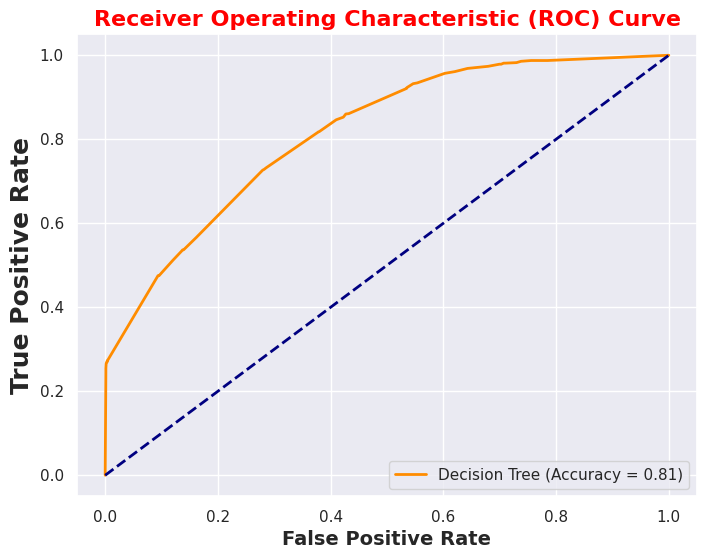

In [61]:
# Make predictions on the test set using the best model
y_pred_proba = best_dtree.predict_proba(X_test)[:, 1]

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Decision Tree (Accuracy = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=18, fontweight='bold')

# Make y-axis tick labels colorful and rotate them
ax.tick_params(axis='y', colors='purple', labelsize=12)
ax.tick_params(axis='x', colors='magenta', labelsize=12)

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, \
          fontweight='bold', color='red')
plt.legend(loc='lower right')
plt.show()


from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)
features

# Model Visualisation

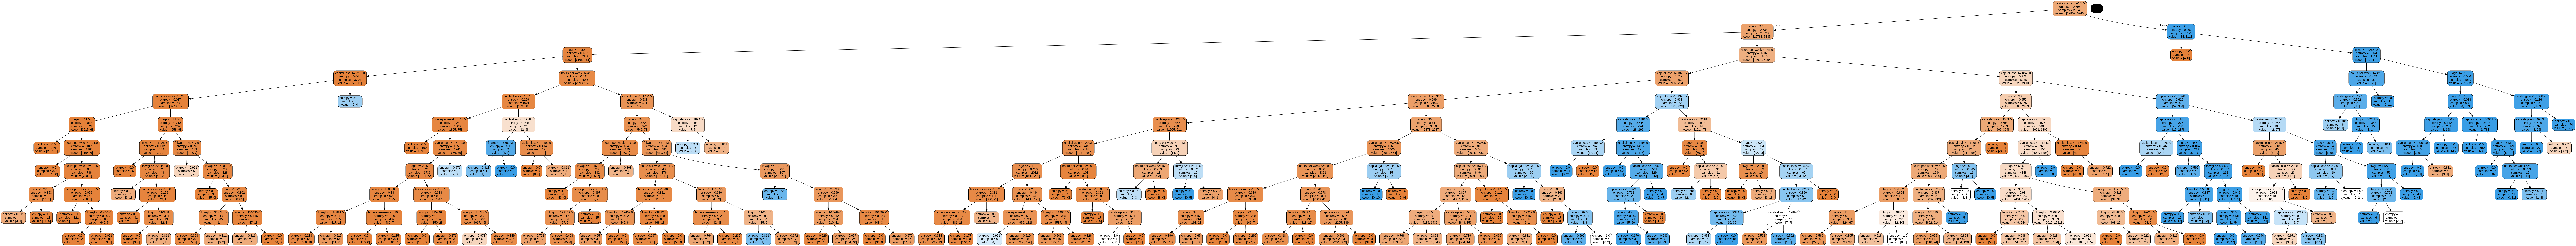

<Figure size 1000x500 with 0 Axes>

In [62]:
features = list(X_train.columns)

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(best_dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Adjust the size of the plot
plt.figure(figsize=(10, 5))
Image(graph[0].create_png())


# **Random Forests**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['total_features'] = np.sum(X_train, axis=1)
X_test['total_features'] = np.sum(X_test, axis=1)

# Defining the RandomForestClassifier
rfc = RandomForestClassifier()

# Reducing the parameter grid and number of estimators
param_dist = {
    'n_estimators': [50, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Use RandomizedSearchCV with parallel processing
random_search = RandomizedSearchCV(
    rfc, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', \
    n_jobs=-1, random_state=42
)

# Fit the model with the training set
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_rfc = RandomForestClassifier(**best_params)

best_rfc.fit(X_train, y_train)

rfc_pred = best_rfc.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, rfc_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))

rfc_accuracy = accuracy_score(y_test, rfc_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.90      4942
           1       0.95      0.29      0.44      1571

    accuracy                           0.82      6513
   macro avg       0.88      0.64      0.67      6513
weighted avg       0.85      0.82      0.79      6513


Confusion Matrix:
[[4916   26]
 [1120  451]]


In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['income_code'])

# we can Check the numbers of our data
print('length of oversampled data is ',len(os_data_X))
print('Number of no income_code in oversampled data', len(os_data_y[os_data_y['income_code']==0]))
print('Number of income_code', len(os_data_y[os_data_y['income_code']==1]))
print('Proportion of no income_code data in oversampled data is ', len(os_data_y[os_data_y['income_code']==0]) / len(os_data_X))
print('Proportion of income_code data in oversampled data is ', len(os_data_y[os_data_y['income_code']==1]) / len(os_data_X))

length of oversampled data is  39604
Number of no income_code in oversampled data 19802
Number of income_code 19802
Proportion of no income_code data in oversampled data is  0.5
Proportion of income_code data in oversampled data is  0.5


In [65]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

selected_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_code']
data_final = data[selected_columns]

X = data_final.drop('income_code', axis=1)  # Assuming 'income_code' is the target variable
y = data_final['income_code']

dtree = DecisionTreeClassifier()
rfe = RFE(dtree, n_features_to_select=len(data_final.columns)-1)  # Select all features except the target variable
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True]
[1 1 1 1 1]


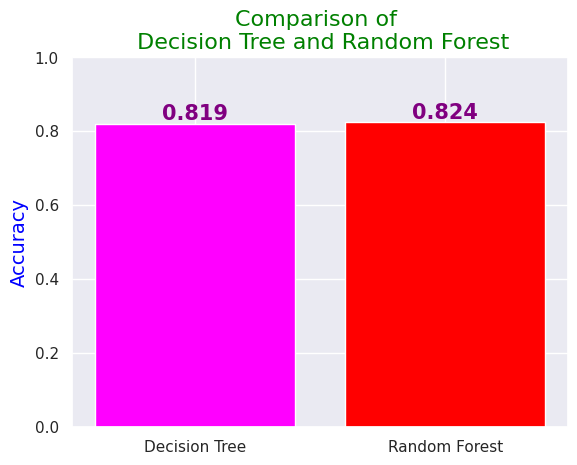

In [66]:
models = ['Decision Tree', 'Random Forest']
accuracies = [dtree_accuracy, rfc_accuracy]

fig, ax = plt.subplots()
bars = plt.bar(models, accuracies, color=['magenta', 'red'])

plt.ylabel('Accuracy', fontsize=14, color='blue')
plt.title('Comparison of \n Decision Tree and Random Forest', fontsize=16, \
          color='green')
plt.ylim(0, 1.0)

# Add accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(acc, 3),
             ha='center', va='bottom', color='purple', fontweight='bold', fontsize=15)  # Adjust color

plt.show()
